# **TASK-3 BY XGBOOST MODEL**
This file contains task-3 operations performed by using XGBoost model as mentioned in the question.


# DATA PREPROCESSING AND DATA TRANSFORMATION

## Importing all the needed libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,Normalizer,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor


## Creating a dataframe for diamond dataset

In [19]:
df = pd.read_csv('diamonds.csv')
df



,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


## Dropping first column from dataframe
Here as we can observe that in first column serial numbering is given for all the instances in dataframe and it is not needed for further evaluation so we are dropping that column.

In [20]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df



,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


## Checking for null values

In [21]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

As observed above there are no null values present in any of the columns in the dataset.



## Removing columns with majority of unknown data readings

Here as per our observations in the EDA section we have dropped all the columns which had more than 40% of unknown data readings.



In [22]:
df.drop(['eye_clean', 'fancy_color_secondary_color','culet_size','culet_condition','girdle_min','girdle_max','fluor_color','fancy_color_dominant_color','fancy_color_overtone','fancy_color_intensity'], axis=1,inplace = True)
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,fluor_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,None,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,None,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,None,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,None,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,None,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,None,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,None,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,70.8,72.0,5.22,4.90,3.47,Faint,1350000


## Imputation
Now we will replace unknown data present in the categorical and ordinal attribute columns by the mode of that column.
In these type of columns mean/median cannot be used for imputation and hence mode is a better approach for imputation



*   Here we will unknown in color column with 'E' as it is the mode of that column.
*   Also we will unknown in cut_quality column with 'Excellent' as it is the mode of that column.
*   And we will unknown in fluor_intensity column with 'None' as it is the mode of that column.


In [23]:
df.loc[df["color"] == "unknown", "color"] = "E"
count = df["color"].value_counts()
print(count)
df.loc[df["cut_quality"] == "unknown", "cut_quality"] = "Excellent"
count = df["cut_quality"].value_counts()
print(count)
df.loc[df["fluor_intensity"] == "unknown", "fluor_intensity"] = "None"
count = df["fluor_intensity"].value_counts()
print(count)


E    42265
F    31566
D    30873
G    29184
H    26073
I    22364
J    16898
K    11750
L     5683
M     3047
Name: color, dtype: int64
Excellent    185468
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64
None           143619
Faint           38302
Medium          20705
Strong          13243
Very Slight      2729
Very Strong      1093
Slight             12
Name: fluor_intensity, dtype: int64


##Encoding



### Label Encoding
Here all the ordinal attributes containing columns will be encoded using label encoding as the hierachy of the various types of attributes can affect the final prediction results for our dependent attribute.

Note that we have not used the library function of Label_Encoder as it will map the first occurence of various ordinal attributes for that column to unique numbers and the hierarchy of the corresponding numbers might not be same as that of various values of that attribute for that column

In [24]:


label_mapping_clarity = {"I3": 0, "I2": 1, "I1": 2,"SI3":3,"SI2":4,"SI1":5,"VS2":6,"VS1":7,"VVS2":8,"VVS1":9,"IF":10}
df = df.replace({"clarity": label_mapping_clarity})
label_mapping_cut_quality = {"Fair": 0, "Good": 1, "Very Good": 2,"Excellent":3,"Ideal":4}
df = df.replace({"cut_quality": label_mapping_cut_quality})
label_mapping_symmetry = {"Poor":0,"Fair": 1, "Good": 2, "Very Good": 3,"Excellent":4}
df = df.replace({"symmetry": label_mapping_symmetry})
label_mapping_polish = {"Poor":0,"Fair": 1, "Good": 2, "Very Good": 3,"Excellent":4}
df = df.replace({"polish": label_mapping_polish})
label_mapping_fluor_intensity = {"None":0,"Faint": 1, "Very Slight": 2, "Slight": 3,"Medium":4,"Strong":5,"Very Strong":6}
df = df.replace({"fluor_intensity": label_mapping_fluor_intensity})
label_mapping_cut = {"Round":0,"Oval": 1, "Emerald": 2, "Pear": 3,"Princess":4,"Radiant":5,"Heart":6,"Cushion Modified":7,"Marquise":8,"Asscher":9,"Cushion":10}
df = df.replace({"cut": label_mapping_cut})
label_mapping_color = {"E":0,"F": 1, "D": 2, "G": 3,"H":4,"I":5,"J":6,"K":7,"L":8,"M":9}
df = df.replace({"color": label_mapping_color})
label_mapping_lab = {"GIA":0,"IGI": 1, "HRD": 2}
df = df.replace({"lab": label_mapping_lab})

df


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,fluor_intensity,total_sales_price
0,0,0,8,0.09,3,1,3,3,62.7,59.0,2.85,2.87,1.79,0,200
1,0,0,8,0.09,2,1,3,3,61.9,59.0,2.84,2.89,1.78,0,200
2,0,0,8,0.09,3,1,3,3,61.1,59.0,2.88,2.90,1.77,0,200
3,0,0,8,0.09,3,1,3,3,62.0,59.0,2.86,2.88,1.78,0,200
4,0,0,8,0.09,2,1,3,4,64.9,58.5,2.79,2.83,1.82,0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0,0,7,10.65,3,0,4,4,61.3,58.0,14.06,14.18,8.66,0,1210692
219699,5,0,6,5.17,3,0,3,3,64.8,65.0,11.55,8.81,5.71,0,1292500
219700,0,0,7,18.07,3,0,4,4,60.2,59.0,17.06,17.10,10.20,0,1315496
219701,4,0,4,0.90,3,0,2,2,70.8,72.0,5.22,4.90,3.47,1,1350000


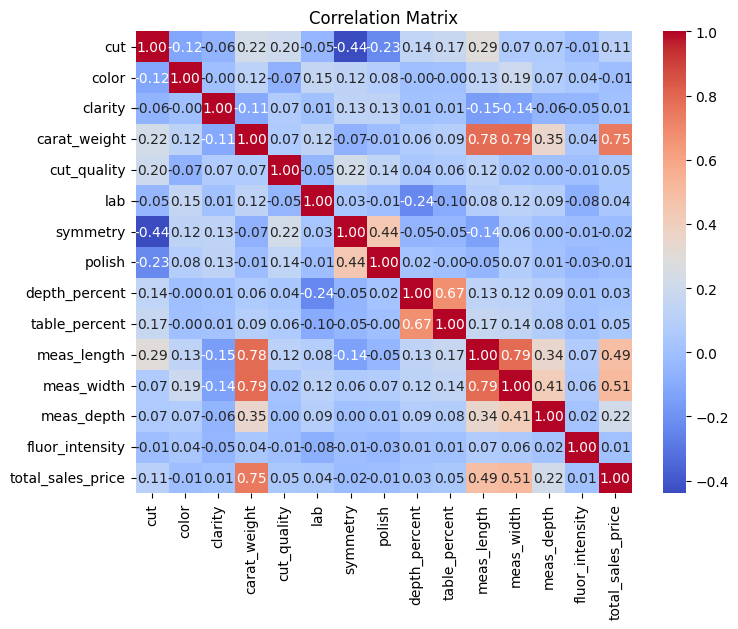

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,fluor_intensity,total_sales_price
cut,1.000000,-0.122227,-0.058612,0.223696,0.200302,-0.045893,-0.439873,-0.228713,0.137397,0.171490,0.293032,0.065676,0.065093,-0.009864,0.105772
color,-0.122227,1.000000,-0.004599,0.117848,-0.069264,0.154788,0.124657,0.083385,-0.004671,-0.000710,0.131961,0.185869,0.073791,0.040948,-0.011515
clarity,-0.058612,-0.004599,1.000000,-0.105747,0.068048,0.005184,0.132085,0.126664,0.009812,0.012751,-0.153244,-0.139439,-0.055404,-0.048604,0.009665
carat_weight,0.223696,0.117848,-0.105747,1.000000,0.066330,0.123062,-0.065552,-0.012959,0.061724,0.090697,0.782683,0.788912,0.350719,0.039323,0.745963
cut_quality,0.200302,-0.069264,0.068048,0.066330,1.000000,-0.049259,0.222693,0.137992,0.038191,0.063960,0.115666,0.018236,0.003629,-0.006390,0.047122
lab,-0.045893,0.154788,0.005184,0.123062,-0.049259,1.000000,0.030227,-0.010977,-0.235559,-0.097961,0.083739,0.116359,0.092396,-0.079739,0.038314
symmetry,-0.439873,0.124657,0.132085,-0.065552,0.222693,0.030227,1.000000,0.444465,-0.052883,-0.051737,-0.139313,0.063619,0.004160,-0.013833,-0.020466
polish,-0.228713,0.083385,0.126664,-0.012959,0.137992,-0.010977,0.444465,1.000000,0.020841,-0.004962,-0.048063,0.073572,0.011241,-0.029907,-0.008245
depth_percent,0.137397,-0.004671,0.009812,0.061724,0.038191,-0.235559,-0.052883,0.020841,1.000000,0.673835,0.128791,0.119692,0.086477,0.011676,0.025408
table_percent,0.171490,-0.000710,0.012751,0.090697,0.063960,-0.097961,-0.051737,-0.004962,0.673835,1.000000,0.165742,0.141250,0.082533,0.005088,0.045192


In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
correlation_matrix

### One-Hot Encoding

Here firstly we will split our data from dataframe into 2 parts X and Y.
X will contain all the independent features of our data and
Y will contain our dependent feature

In [26]:

X = df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14]]
y = df.iloc[:, [3]].values
print(f"X :- {X}")
print("*************************************************************************************************************")
print(f"Y :- {y}")


X :-         cut  color  clarity  cut_quality  lab  symmetry  polish  \
0         0      0        8            3    1         3       3   
1         0      0        8            2    1         3       3   
2         0      0        8            3    1         3       3   
3         0      0        8            3    1         3       3   
4         0      0        8            2    1         3       4   
...     ...    ...      ...          ...  ...       ...     ...   
219698    0      0        7            3    0         4       4   
219699    5      0        6            3    0         3       3   
219700    0      0        7            3    0         4       4   
219701    4      0        4            3    0         2       2   
219702    3      0        8            3    0         3       4   

        depth_percent  table_percent  meas_length  meas_width  meas_depth  \
0                62.7           59.0         2.85        2.87        1.79   
1                61.9           59.0

Now we will use one-hot encoding on all the columns containing categorical data.
Here we will use 'ColumnTranformer' for one-hot encoding

The columns 'cut','quality' and 'lab' will be one-hot encoded

In [27]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,5])], remainder='passthrough')
X= np.array(ct.fit_transform(X))

In [28]:
y = y.reshape(len(y),1)


# XGBOOST REGRESSION MODEL BUILDING

### Train-Test Split

Splitting our data into train and test datasets.
Here testing dataset contains 20% of all the data and training dataset contains the remaining 80%.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


### Training our Model

Now we will create our XGBoost model and will fit and train it on the training dataset and then generate 'y_pred' which contains prediction for our testing dataset.

In [30]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# MODEL EVALUATION

### RMSE

In [31]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  0.2722868774300955


### MAE

In [32]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  0.021254224894627544


### Relative RMSE

In [33]:
relative_rmse=(rmse/df['total_sales_price'].mean())*100
print("Relative RMSE Error = ",relative_rmse)

Relative RMSE Error =  0.003941581145082339


### R2 Score

In [34]:
r2Score=r2_score(y_test, y_pred)
print("R2 Score = ",r2Score)

R2 Score =  0.9925051923285149
